In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# import dataset
mm = fetch_ucirepo(id=161)
mm_X = mm.data.features
mm_y = mm.data.targets
mm_df = pd.concat([mm_X, mm_y], axis=1)
mm_df

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [ ]:
mm_df.shape

(961, 6)

In [ ]:
mm_df.isnull().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [ ]:
mm_df1 = mm_df.dropna()

In [ ]:
mm_df1.shape

(830, 6)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

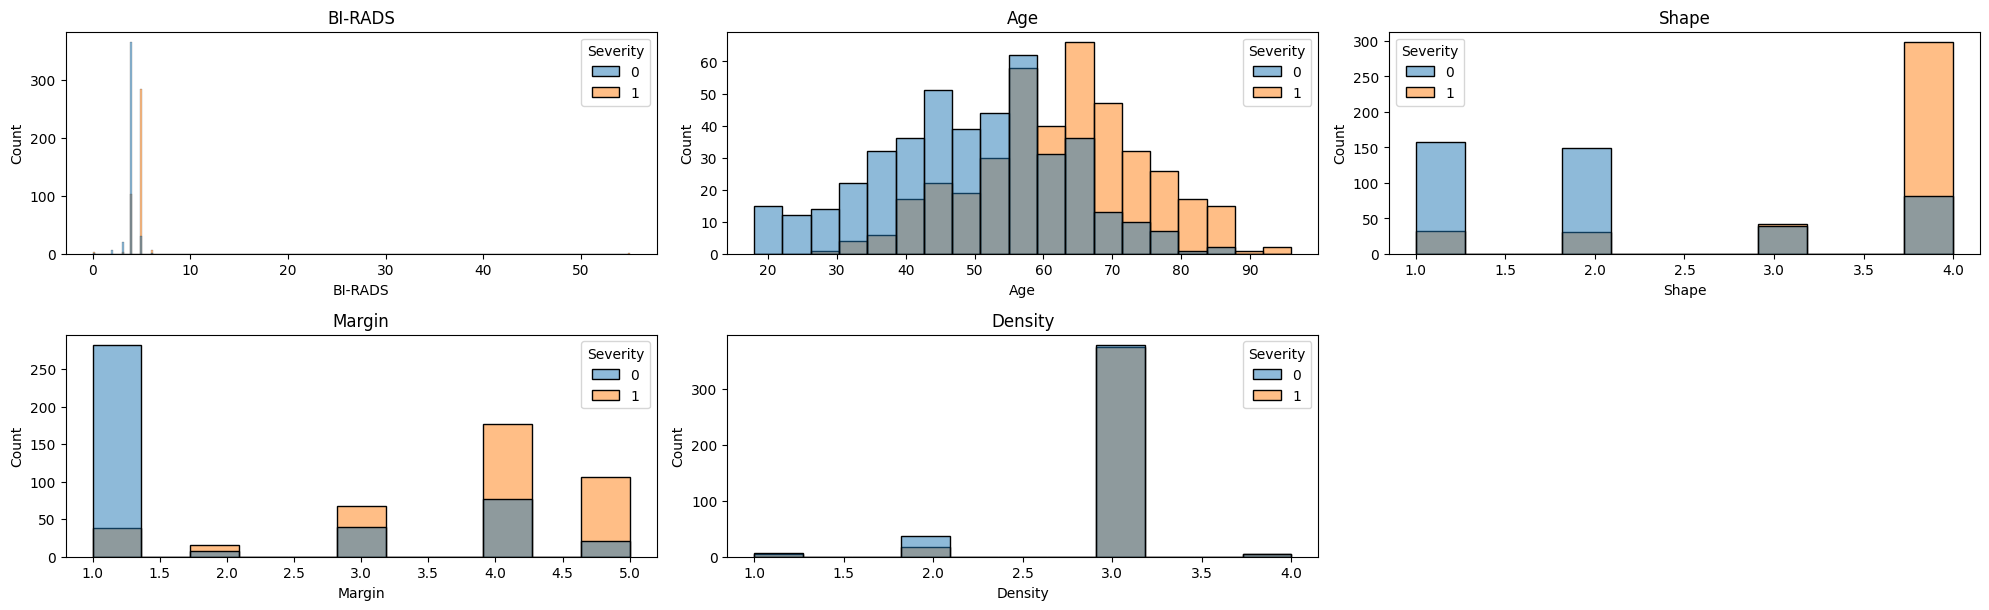

In [ ]:
num_list=['BI-RADS', 'Age' ,'Shape','Margin', 'Density']
fig = plt.figure(figsize=(20,30))

for i in range(len(num_list)):
    plt.subplot(10,3,i+1)
    plt.title(num_list[i])

    sns.histplot(mm_df1,x=mm_df1[num_list[i]],hue='Severity')

plt.tight_layout()

In [ ]:
mm_df1['BI-RADS'].value_counts()

BI-RADS
4.0     468
5.0     316
3.0      24
6.0       9
2.0       7
0.0       5
55.0      1
Name: count, dtype: int64

In [ ]:
idx = mm_df1[mm_df1['BI-RADS'] == 55].index
mm_df1.loc[idx, 'BI-RADS'] = 5

In [ ]:
mm_df1['BI-RADS'].value_counts()

BI-RADS
4.0    468
5.0    317
3.0     24
6.0      9
2.0      7
0.0      5
Name: count, dtype: int64

In [ ]:
mm_df1['Margin'].value_counts()

Margin
1.0    320
4.0    254
5.0    127
3.0    106
2.0     23
Name: count, dtype: int64

In [ ]:
mm_df1['Shape'].value_counts()

Shape
4.0    379
1.0    190
2.0    180
3.0     81
Name: count, dtype: int64

In [ ]:
mm_df1['Density'].value_counts()

Density
3.0    755
2.0     56
1.0     11
4.0      8
Name: count, dtype: int64

In [ ]:
mm_df1['Age'].value_counts()

Age
67.0    30
59.0    29
66.0    28
57.0    27
46.0    25
        ..
88.0     1
93.0     1
26.0     1
18.0     1
20.0     1
Name: count, Length: 72, dtype: int64

<Axes: >

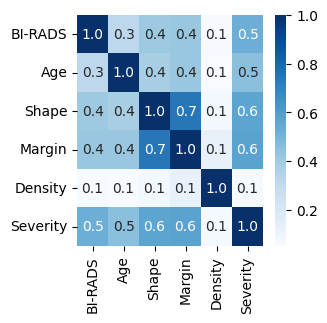

In [ ]:
plt.figure(figsize = (3,3))
sns.heatmap(mm_df1.corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f')

In [ ]:
mm_df1 =mm_df1.drop('Density', axis=1)
mm_df1

,BI-RADS,Age,Shape,Margin,Severity
0,5.0,67.0,3.0,5.0,1
2,5.0,58.0,4.0,5.0,1
3,4.0,28.0,1.0,1.0,0
8,5.0,57.0,1.0,5.0,1
10,5.0,76.0,1.0,4.0,1
...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,0
957,4.0,56.0,4.0,5.0,1
958,4.0,64.0,4.0,5.0,0
959,5.0,66.0,4.0,5.0,1


In [ ]:
df = pd.DataFrame()
df['BI-RADS = 0'] = mm_df1['BI-RADS'] == 0
df['BI-RADS = 2'] = mm_df1['BI-RADS'] == 2
df['BI-RADS = 3'] = mm_df1['BI-RADS'] == 3
df['BI-RADS = 4'] = mm_df1['BI-RADS'] == 4
df['BI-RADS = 5'] = mm_df1['BI-RADS'] == 5
df['BI-RADS = 6'] = mm_df1['BI-RADS'] == 6

df['Age>60'] = mm_df1['Age']>60

df['Shape = 1'] = mm_df1['Shape'] == 1
df['Shape = 2'] = mm_df1['Shape'] == 2
df['Shape = 3'] = mm_df1['Shape'] == 3
df['Shape = 4'] = mm_df1['Shape'] == 4

df['Margin = 1'] = mm_df1['Margin'] == 1
df['Margin = 2'] = mm_df1['Margin'] == 2
df['Margin = 3'] = mm_df1['Margin'] == 3
df['Margin = 4'] = mm_df1['Margin'] == 4
df['Margin = 5'] = mm_df1['Margin'] == 5



df['Severity'] = mm_df1['Severity'] ==1
df

,BI-RADS = 0,BI-RADS = 2,BI-RADS = 3,BI-RADS = 4,BI-RADS = 5,BI-RADS = 6,Age>60,Shape = 1,Shape = 2,Shape = 3,Shape = 4,Margin = 1,Margin = 2,Margin = 3,Margin = 4,Margin = 5,Severity
0,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,True
2,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
8,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True
10,False,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
957,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True
958,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False
959,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,True


In [ ]:
df['sample_id'] = np.arange(0, df.shape[0], 1).astype(str)
df['id'] = df['sample_id'].apply(lambda x:  'h'+x)
df.drop(columns=['sample_id'], inplace=True)
df=df.set_index('id')
df

,BI-RADS = 0,BI-RADS = 2,BI-RADS = 3,BI-RADS = 4,BI-RADS = 5,BI-RADS = 6,Age>60,Shape = 1,Shape = 2,Shape = 3,Shape = 4,Margin = 1,Margin = 2,Margin = 3,Margin = 4,Margin = 5,Severity
id,,,,,,,,,,,,,,,,,
h0,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,True
h1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True
h2,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
h3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True
h4,False,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h825,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
h826,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,True
h827,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,False


In [ ]:
df.shape

(830, 17)

In [ ]:
df.to_csv('mammographic_mass.csv', index=True)